## **Importing Libraries**

In [63]:
import os
from time import time
from time import sleep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

## **API Setup**

In [64]:


url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b0f866e3-021d-440d-825e-02b4265a571c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  # print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [65]:
type(data)

dict

In [66]:

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)


df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10342,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19430137.00,19430137.00,False,NaN,1,NaN,NaN,None,2023-07-15T19:01:00.000Z,30333.27,10963078360.87,-52.49,0.12,0.85,0.41,19.59,12.09,-0.70,589379505522.38,48.39,636998576796.97,None,2023-07-15T19:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 19:02:26.101017+00:00
1,1027,Ethereum,ETH,ethereum,7124,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120201621.21,120201621.21,True,NaN,2,NaN,NaN,None,2023-07-15T19:01:00.000Z,1935.59,5817582123.53,-45.30,0.19,1.05,4.08,16.10,5.98,-9.41,232660696785.94,19.10,232660696785.94,None,2023-07-15T19:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 19:02:26.101017+00:00
2,825,Tether,USDT,tether,56964,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83613851903.08,86715788906.06,True,NaN,3,NaN,NaN,None,2023-07-15T19:00:00.000Z,1.00,23327478974.08,-45.51,0.00,-0.04,0.01,0.12,0.03,-0.03,83633978584.13,6.87,86736662254.02,None,2023-07-15T19:00:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-15 19:02:26.101017+00:00
3,1839,BNB,BNB,bnb,1505,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155848849.05,155848849.05,False,NaN,4,NaN,NaN,None,2023-07-15T19:00:00.000Z,251.15,455394898.60,-46.38,0.27,2.17,6.45,6.19,-19.27,-28.02,39140917889.09,3.21,39140917889.09,None,2023-07-15T19:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 19:02:26.101017+00:00
4,52,XRP,XRP,xrp,993,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00,52544091958.00,99988621362.00,False,NaN,5,NaN,NaN,None,2023-07-15T19:01:00.000Z,0.73,3999119318.73,-55.76,1.84,5.82,53.99,50.61,71.26,38.58,38149979388.88,3.13,72605649783.37,None,2023-07-15T19:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 19:02:26.101017+00:00
5,3408,USD Coin,USDC,usd-coin,13319,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,27281165907.43,27281165907.43,False,NaN,6,NaN,NaN,None,2023-07-15T19:00:00.000Z,1.00,2754387956.32,-49.17,0.01,-0.03,-0.01,-0.02,0.02,0.04,27280191472.43,2.24,27280191472.43,None,2023-07-15T19:00:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-15 19:02:26.101017+00:00
6,2010,Cardano,ADA,cardano,871,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00,34976479738.51,35983607755.53,False,NaN,7,NaN,NaN,None,2023-07-15T19:00:00.000Z,0.33,324780284.29,-71.80,0.59,3.02,14.33,27.51,-9.75,-26.56,11578667527.58,0.95,14896869057.05,None,2023-07-15T19:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 19:02:26.101017+00:00
7,5426,Solana,SOL,solana,486,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,402545408.69,552440760.28,True,NaN,8,NaN,NaN,None,2023-07-15T19:00:00.000Z,27.94,1455423368.80,-32.38,1.48,6.57,28.26,90.49,35.07,14.13,11246016544.16,0.92,15433682252.24,None,2023-07-15T19:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 19:02:26.101017+00:00
8,74,Dogecoin,DOGE,dogecoin,743,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140185646383.71,140185646383.71,True,NaN,9,NaN,NaN,None,2023-07-15T19:01:00.000Z,0.07,892308702.36,19.32,0.64,8.02,11.21,18.38,0.98,-19.31,10222045482

## **Getting Data (Automation)**

In [67]:

def apirunner():
  global df
  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'20',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'b0f866e3-021d-440d-825e-02b4265a571c',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    # print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

  df = pd.json_normalize(data['data'])
  df['timestamp'] = pd.to_datetime('now', utc=True)
  df

  if not os.path.isfile(r'D:\Crypto API Scrapper\API.csv'):
    df.to_csv(r'D:\Crypto API Scrapper\API.csv', header="column_names")
  else:
    df.to_csv(r'D:\Crypto API Scrapper\API.csv', mode="a", header=False)

In [9]:
for i in range(2):
  apirunner()
  print("Run")
  sleep(60)
exit()

Run
Run


: 

In [68]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10342,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19430137.00,19430137.00,False,NaN,1,NaN,NaN,None,2023-07-15T19:01:00.000Z,30333.27,10963078360.87,-52.49,0.12,0.85,0.41,19.59,12.09,-0.70,589379505522.38,48.39,636998576796.97,None,2023-07-15T19:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 19:02:26.101017+00:00
1,1027,Ethereum,ETH,ethereum,7124,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120201621.21,120201621.21,True,NaN,2,NaN,NaN,None,2023-07-15T19:01:00.000Z,1935.59,5817582123.53,-45.30,0.19,1.05,4.08,16.10,5.98,-9.41,232660696785.94,19.10,232660696785.94,None,2023-07-15T19:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 19:02:26.101017+00:00
2,825,Tether,USDT,tether,56964,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83613851903.08,86715788906.06,True,NaN,3,NaN,NaN,None,2023-07-15T19:00:00.000Z,1.00,23327478974.08,-45.51,0.00,-0.04,0.01,0.12,0.03,-0.03,83633978584.13,6.87,86736662254.02,None,2023-07-15T19:00:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-15 19:02:26.101017+00:00
3,1839,BNB,BNB,bnb,1505,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155848849.05,155848849.05,False,NaN,4,NaN,NaN,None,2023-07-15T19:00:00.000Z,251.15,455394898.60,-46.38,0.27,2.17,6.45,6.19,-19.27,-28.02,39140917889.09,3.21,39140917889.09,None,2023-07-15T19:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 19:02:26.101017+00:00
4,52,XRP,XRP,xrp,993,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00,52544091958.00,99988621362.00,False,NaN,5,NaN,NaN,None,2023-07-15T19:01:00.000Z,0.73,3999119318.73,-55.76,1.84,5.82,53.99,50.61,71.26,38.58,38149979388.88,3.13,72605649783.37,None,2023-07-15T19:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 19:02:26.101017+00:00
5,3408,USD Coin,USDC,usd-coin,13319,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,27281165907.43,27281165907.43,False,NaN,6,NaN,NaN,None,2023-07-15T19:00:00.000Z,1.00,2754387956.32,-49.17,0.01,-0.03,-0.01,-0.02,0.02,0.04,27280191472.43,2.24,27280191472.43,None,2023-07-15T19:00:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-15 19:02:26.101017+00:00
6,2010,Cardano,ADA,cardano,871,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00,34976479738.51,35983607755.53,False,NaN,7,NaN,NaN,None,2023-07-15T19:00:00.000Z,0.33,324780284.29,-71.80,0.59,3.02,14.33,27.51,-9.75,-26.56,11578667527.58,0.95,14896869057.05,None,2023-07-15T19:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 19:02:26.101017+00:00
7,5426,Solana,SOL,solana,486,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,402545408.69,552440760.28,True,NaN,8,NaN,NaN,None,2023-07-15T19:00:00.000Z,27.94,1455423368.80,-32.38,1.48,6.57,28.26,90.49,35.07,14.13,11246016544.16,0.92,15433682252.24,None,2023-07-15T19:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 19:02:26.101017+00:00
8,74,Dogecoin,DOGE,dogecoin,743,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140185646383.71,140185646383.71,True,NaN,9,NaN,NaN,None,2023-07-15T19:01:00.000Z,0.07,892308702.36,19.32,0.64,8.02,11.21,18.38,0.98,-19.31,10222045482

In [79]:
df3 = pd.read_csv(r'D:\Crypto API Scrapper\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10342,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19430050.00,19430050.00,False,NaN,1,NaN,NaN,NaN,2023-07-15T16:58:00.000Z,30291.58,15543584555.09,-33.06,-0.06,-2.93,0.13,21.36,11.84,-0.22,588566840869.55,48.47,636123100983.29,NaN,2023-07-15T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 17:00:26.783015+00:00
1,1,1027,Ethereum,ETH,ethereum,7124,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120201621.21,120201621.21,True,NaN,2,NaN,NaN,NaN,2023-07-15T16:58:00.000Z,1932.68,7768156607.11,-31.62,-0.15,-2.93,3.74,17.97,5.88,-8.01,232311119450.03,19.13,232311119450.03,NaN,2023-07-15T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 17:00:26.783015+00:00
2,2,825,Tether,USDT,tether,56963,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83613851903.08,86715788906.06,True,NaN,3,NaN,NaN,NaN,2023-07-15T16:58:00.000Z,1.00,30020022863.28,-34.18,0.01,0.00,0.03,0.14,0.03,-0.02,83646032831.20,6.89,86749163693.93,NaN,2023-07-15T16:58:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-15 17:00:26.783015+00:00
3,3,1839,BNB,BNB,bnb,1505,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155848861.97,155848861.97,False,NaN,4,NaN,NaN,NaN,2023-07-15T16:58:00.000Z,250.41,553063799.96,-38.27,-0.06,-2.03,5.72,7.84,-19.51,-27.75,39025779866.72,3.21,39025779866.72,NaN,2023-07-15T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 17:00:26.783015+00:00
4,4,52,XRP,XRP,xrp,993,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00,52544091958.00,99988621362.00,False,NaN,5,NaN,NaN,NaN,2023-07-15T16:58:00.000Z,0.71,4875498211.12,-60.25,-2.39,-5.71,50.04,49.09,67.17,35.59,37141248467.41,3.06,70685869873.06,NaN,2023-07-15T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 17:00:26.783015+00:00
5,5,3408,USD Coin,USDC,usd-coin,13318,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,27281669164.12,27281669164.12,False,NaN,6,NaN,NaN,NaN,2023-07-15T16:58:00.000Z,1.00,3520347089.28,-39.86,0.01,-0.01,0.01,-0.01,0.01,0.02,27282347650.01,2.25,27282347650.01,NaN,2023-07-15T16:58:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-15 17:00:26.783015+00:00
6,6,2010,Cardano,ADA,cardano,871,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00,34976481904.85,35983607755.53,False,NaN,7,NaN,NaN,NaN,2023-07-15T16:58:00.000Z,0.33,415224689.31,-70.60,-0.69,-3.58,13.03,28.24,-10.29,-26.36,11520871092.48,0.95,14822508466.46,NaN,2023-07-15T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 17:00:26.783015+00:00
7,7,5426,Solana,SOL,solana,486,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,402545489.94,552440841.84,True,NaN,8,NaN,NaN,NaN,2023-07-15T16:58:00.000Z,27.22,1618302453.00,-33.33,-1.53,-0.83,24.61,88.25,30.99,11.68,10958073316.47,0.90,15038517134.57,NaN,2023-07-15T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 17:00:26.783015+00:00
8,8,74,Dogecoin,DOGE,dogecoin,743,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,140184526383.71,140184526383.71,True,NaN,9,NaN,NaN,NaN,2023-07-15T16:58:00.000Z,0.07,976417801.09,25.32,0.10,1.72,11.38,20.07,

## **Data Transformation**

In [81]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)
df3.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10342,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19430050.00,19430050.00,False,NaN,1,NaN,NaN,NaN,2023-07-15T16:58:00.000Z,30291.58,15543584555.09,-33.06,-0.06,-2.93,0.13,21.36,11.84,-0.22,588566840869.55,48.47,636123100983.29,NaN,2023-07-15T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 17:00:26.783015+00:00
1,1,1027,Ethereum,ETH,ethereum,7124,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120201621.21,120201621.21,True,NaN,2,NaN,NaN,NaN,2023-07-15T16:58:00.000Z,1932.68,7768156607.11,-31.62,-0.15,-2.93,3.74,17.97,5.88,-8.01,232311119450.03,19.13,232311119450.03,NaN,2023-07-15T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 17:00:26.783015+00:00
2,2,825,Tether,USDT,tether,56963,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83613851903.08,86715788906.06,True,NaN,3,NaN,NaN,NaN,2023-07-15T16:58:00.000Z,1.00,30020022863.28,-34.18,0.01,0.00,0.03,0.14,0.03,-0.02,83646032831.20,6.89,86749163693.93,NaN,2023-07-15T16:58:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-15 17:00:26.783015+00:00
3,3,1839,BNB,BNB,bnb,1505,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155848861.97,155848861.97,False,NaN,4,NaN,NaN,NaN,2023-07-15T16:58:00.000Z,250.41,553063799.96,-38.27,-0.06,-2.03,5.72,7.84,-19.51,-27.75,39025779866.72,3.21,39025779866.72,NaN,2023-07-15T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 17:00:26.783015+00:00
4,4,52,XRP,XRP,xrp,993,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00,52544091958.00,99988621362.00,False,NaN,5,NaN,NaN,NaN,2023-07-15T16:58:00.000Z,0.71,4875498211.12,-60.25,-2.39,-5.71,50.04,49.09,67.17,35.59,37141248467.41,3.06,70685869873.06,NaN,2023-07-15T16:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-15 17:00:26.783015+00:00


In [82]:
df4 = df3.groupby("name", sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.07,-2.96,0.12,21.36,11.84,-0.20
Ethereum,-0.16,-2.96,3.74,17.98,5.89,-7.96
Tether,0.01,0.00,0.03,0.14,0.03,-0.03
BNB,-0.05,-2.01,5.74,7.83,-19.51,-27.74
XRP,-2.38,-5.70,50.05,49.09,67.18,35.60
USD Coin,0.01,-0.01,0.00,-0.02,0.01,0.02
Cardano,-0.69,-3.57,13.04,28.24,-10.29,-26.36
Solana,-1.54,-0.81,24.64,88.23,31.01,11.70
Dogecoin,0.11,1.73,11.39,20.08,1.06,-19.00


In [83]:
df4 = df4.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h     -0.07
                 quote.USD.percent_change_24h    -2.96
                 quote.USD.percent_change_7d      0.12
                 quote.USD.percent_change_30d    21.36
                 quote.USD.percent_change_60d    11.84
                 quote.USD.percent_change_90d    -0.20
Ethereum         quote.USD.percent_change_1h     -0.16
                 quote.USD.percent_change_24h    -2.96
                 quote.USD.percent_change_7d      3.74
                 quote.USD.percent_change_30d    17.98
                 quote.USD.percent_change_60d     5.89
                 quote.USD.percent_change_90d    -7.96
Tether           quote.USD.percent_change_1h      0.01
                 quote.USD.percent_change_24h     0.00
                 quote.USD.percent_change_7d      0.03
                 quote.USD.percent_change_30d     0.14
                 quote.USD.percent_change_60d     0.03
                 qu

In [84]:
df5 = df4.to_frame(name="values")
type(df5)

df5

values
name                                                
Bitcoin         quote.USD.percent_change_1h    -0.07
                quote.USD.percent_change_24h   -2.96
                quote.USD.percent_change_7d     0.12
                quote.USD.percent_change_30d   21.36
                quote.USD.percent_change_60d   11.84
                quote.USD.percent_change_90d   -0.20
Ethereum        quote.USD.percent_change_1h    -0.16
                quote.USD.percent_change_24h   -2.96
                quote.USD.percent_change_7d     3.74
                quote.USD.percent_change_30d   17.98
                quote.USD.percent_change_60d    5.89
                quote.USD.percent_change_90d   -7.96
Tether          quote.USD.percent_change_1h     0.01
                quote.USD.percent_change_24h    0.00
                quote.USD.percent_change_7d     0.03
                quote.USD.percent_change_30d    0.14
                quote.USD.percent_change_60d    0.03
                quote.USD.percent_change_90d   -0.03
BNB             quote.USD.percent_change_1h    -0.05
                quote.USD.percent_change_24h   -2.01
                quote.USD.percent_change_7d     5.74
                quote.USD.percent_change_30d    7.83
                quote.USD.percent_change_60d  -19.51
                quote.USD.percent_change_90d  -27.74
XRP             quote.USD.percent_change_1h    -2.38
                quote.USD.percent_change_24h   -5.70
                quote.USD.percent_change_7d    50.05
                quote.USD.percent_change_30d   49.09
                quote.USD.percent_change_60d   67.18
                quote.USD.percent_change_90d   35.60
USD Coin        quote.USD.percent_change_1h     0.01
                quote.USD.percent_change_24h   -0.01
                quote.USD.percent_change_7d     0.00
                quote.USD.percent_change_30d   -0.02
                quote.USD.percent_change_60d    0.01
                quote.USD.percent_change_90d    0.02
Cardano         quote.USD.percent_change_1h    -0.69
                quote.USD.percent_change_24h   -3.57
                quote.USD.percent_change_7d    13.04
                quote.USD.percent_change_30d   28.24
                quote.USD.percent_change_60d  -10.29
                quote.USD.percent_change_90d  -26.36
Solana          quote.USD.percent_change_1h    -1.54
                quote.USD.percent_change_24h   -0.81
                quote.USD.percent_change_7d    24.64
                quote.USD.percent_change_30d   88.23
                quote.USD.percent_change_60d   31.01
                quote.USD.percent_change_90d   11.70
Dogecoin        quote.USD.percent_change_1h     0.11
                quote.USD.percent_change_24h    1.73
                quote.USD.percent_change_7d    11.39
                quote.USD.percent_change_30d   20.08
                quote.USD.percent_change_60d    1.06
                quote.USD.percent_change_90d  -19.00
Polygon         quote.USD.percent_change_1h    -0.70
                quote.USD.percent_change_24h   -3.59
                quote.USD.percent_change_7d    17.89
                quote.USD.percent_change_30d   38.56
                quote.USD.percent_change_60d   -4.67
                quote.USD.percent_change_90d  -31.19
TRON            quote.USD.percent_change_1h    -0.29
                quote.USD.percent_change_24h   -0.82
                quote.USD.percent_change_7d     1.61
                quote.USD.percent_change_30d   14.72
                quote.USD.percent_change_60d   14.17
                quote.USD.percent_change_90d   21.30
Litecoin        quote.USD.percent_change_1h    -0.26
                quote.USD.percent_change_24h   -6.18
                quote.USD.percent_change_7d    -3.82
                quote.USD.percent_change_30d   28.18
                quote.USD.percent_change_60d    4.54
                quote.USD.percent_change_90d   -7.42
Polkadot        quote.USD.percent_change_1h    -0.31
                quote.USD.percent_change_24h   -2.52
                qu

In [85]:
# Need to make Dynamic Indexing
index = pd.Index(range(120))

df6 = df5.reset_index()
df6.rename(columns={"level_1": "percent_change"}, inplace=True)
df6["percent_change"] = df6["percent_change"].replace(["quote.USD.percent_change_1h", "quote.USD.percent_change_24h", "quote.USD.percent_change_7d", "quote.USD.percent_change_30d", "quote.USD.percent_change_60d", "quote.USD.percent_change_90d"], ["1h", "24h", "7d", "30d", "60d", "90d"])
df6

,name,percent_change,values
0,Bitcoin,1h,-0.07
1,Bitcoin,24h,-2.96
2,Bitcoin,7d,0.12
3,Bitcoin,30d,21.36
4,Bitcoin,60d,11.84
5,Bitcoin,90d,-0.20
6,Ethereum,1h,-0.16
7,Ethereum,24h,-2.96
8,Ethereum,7d,3.74
9,Ethereum,30d,17.98


## **Data Visualization**

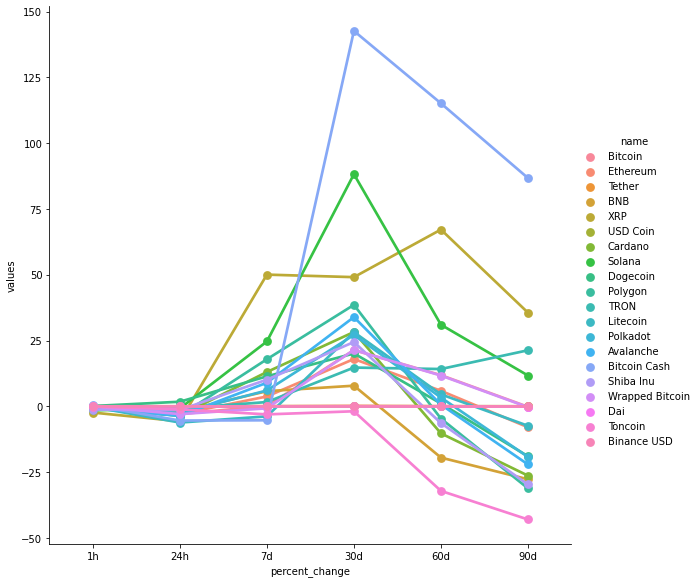

In [86]:
sns.catplot(x="percent_change", y="values", kind = "point", hue="name", data=df6, height=8)

In [88]:

df7 = df3[['name', 'quote.USD.price', 'timestamp']]
df7 = df7.query("name == 'Bitcoin'")
df7

,name,quote.USD.price,timestamp
0,Bitcoin,30291.58,2023-07-15 17:00:26.783015+00:00
20,Bitcoin,30291.28,2023-07-15 17:01:27.846191+00:00


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

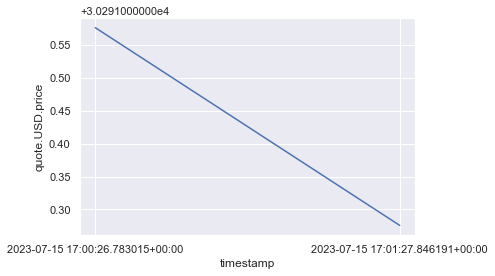

In [89]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="timestamp", y="quote.USD.price", data=df7)